In [ ]:
import pandas as pd

In [ ]:
# Adding gender population
dataframe = pd.read_excel("/content/global_terrorism_index.xlsx")
dataframe_gender = pd.read_csv("/content/share-population-female.csv")
print(dataframe_gender.head())
dataframe_gender.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe = dataframe.merge(dataframe_gender, on=['Country', 'Year'], how='left')
dataframe = dataframe.drop(columns=['Code'])

        Entity Code  Year  Population, female (% of total population)
0  Afghanistan  AFG  1960                                   48.083054
1  Afghanistan  AFG  1961                                   48.165000
2  Afghanistan  AFG  1962                                   48.242370
3  Afghanistan  AFG  1963                                   48.315890
4  Afghanistan  AFG  1964                                   48.385273


In [ ]:
# Added Corruption Index
dataframe_corruption = pd.read_csv("/content/TI-corruption-perception-index.csv")
print(dataframe_corruption.head())
dataframe_corruption.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe = dataframe.merge(dataframe_corruption, on=['Country', 'Year'], how='left')
dataframe = dataframe.drop(columns=['Code'])

        Entity Code  Year  \
0  Afghanistan  AFG  2012   
1  Afghanistan  AFG  2013   
2  Afghanistan  AFG  2014   
3  Afghanistan  AFG  2015   
4  Afghanistan  AFG  2016   

   Corruption Perception Index - Transparency International (2018)  
0                                                  8                
1                                                  8                
2                                                 12                
3                                                 11                
4                                                 15                


In [ ]:
#Adding migration information
dataframe_migration = pd.read_csv("/content/migration.csv")
dataframe_migration = dataframe_migration[["Year", "Country", "Net migration rate"]]
print(dataframe_migration.head())
dataframe = dataframe.merge(dataframe_migration, on=['Country', 'Year'], how='left')

   Year                     Country  Net migration rate
0  1955   Central and Southern Asia               0.197
1  1960   Central and Southern Asia               0.275
2  1965   Central and Southern Asia               0.176
3  1970   Central and Southern Asia               0.022
4  1975   Central and Southern Asia              -0.285


In [ ]:
# Armed Forced Shared Population = Armed forces population /  Total population
# Nuclear Weapon status = Number of weapons
dataframe_armedforces = pd.read_csv("/content/armed-forces-personnel-percent.csv")
print(dataframe_armedforces.head())
dataframe_armedforces.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_armedforces = dataframe_armedforces[["Country","Year","armed_forces_share_population"]]
dataframe = dataframe.merge(dataframe_armedforces, on=['Country', 'Year'], how='left')


        Entity Code  Year  armed_forces_share_population
0  Afghanistan  AFG  1985                       0.393694
1  Afghanistan  AFG  1989                       0.463397
2  Afghanistan  AFG  1990                       0.467278
3  Afghanistan  AFG  1991                       0.338371
4  Afghanistan  AFG  1992                       0.310655


In [ ]:
dataframe_nuclearweapons = pd.read_csv("/content/country-position-nuclear-weapons.csv")
print(dataframe_nuclearweapons.head())
dataframe_nuclearweapons.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_nuclearweapons = dataframe_nuclearweapons[["Country","Year","nuclear_weapons_status"]]
dataframe = dataframe.merge(dataframe_nuclearweapons, on=['Country', 'Year'], how='left')

     Entity      Code  Year  nuclear_weapons_status
0  Abkhazia  OWID_ABK  1938                       0
1  Abkhazia  OWID_ABK  1939                       0
2  Abkhazia  OWID_ABK  1940                       0
3  Abkhazia  OWID_ABK  1941                       0
4  Abkhazia  OWID_ABK  1942                       0


In [ ]:
dataframe_literacy = pd.read_csv("/content/cross-country-literacy-rates.csv")
print(dataframe_literacy.head())
dataframe_literacy.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_literacy = dataframe_literacy.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_literacy, on=['Country', 'Year'], how='left')


        Entity Code  Year  \
0  Afghanistan  AFG  1979   
1  Afghanistan  AFG  2011   
2  Afghanistan  AFG  2015   
3      Albania  ALB  2001   
4      Albania  ALB  2008   

   Literacy rates (World Bank, CIA World Factbook, and other sources)  
0                                          18.157681                   
1                                          31.741119                   
2                                          38.168041                   
3                                          98.712982                   
4                                          95.938637                   


In [ ]:
dataframe_military = pd.read_csv("/content/military-expenditure-total.csv")
print(dataframe_military)
dataframe_military.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_military = dataframe_military.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_military, on=['Country', 'Year'], how='left')
def scientific_to_decimal(value):
    return '{:.10f}'.format(float(value))
dataframe['military_expenditure'] = dataframe['military_expenditure'].apply(scientific_to_decimal)

print(dataframe)

           Entity Code  Year  military_expenditure
0     Afghanistan  AFG  1970               5373185
1     Afghanistan  AFG  1973               6230685
2     Afghanistan  AFG  1974               6056124
3     Afghanistan  AFG  1975               6357396
4     Afghanistan  AFG  1976               8108200
...           ...  ...   ...                   ...
8273     Zimbabwe  ZWE  2015            1083475614
8274     Zimbabwe  ZWE  2016            1046329810
8275     Zimbabwe  ZWE  2017             986095198
8276     Zimbabwe  ZWE  2018            1100563838
8277     Zimbabwe  ZWE  2019             546939000

[8278 rows x 4 columns]
     iso3c              Country  Rank     Score  Incidents  Fatalities  \
0      IRQ                 Iraq     1  9.599967       1288        2086   
1      PAK             Pakistan     2  9.152620        638        1322   
2      AFG          Afghanistan     3  9.134265        507        1511   
3      SYR                Syria     4  8.238079        168        1

In [ ]:
dataframe_economic_inequality = pd.read_csv("/content/economic-inequality-gini-index.csv")
print(dataframe_economic_inequality.head())
dataframe_economic_inequality.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_economic_inequality = dataframe_economic_inequality.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_economic_inequality, on=['Country', 'Year'], how='left')

    Entity Code  Year  Gini coefficient
0  Albania  ALB  1996          0.270103
1  Albania  ALB  2002          0.317390
2  Albania  ALB  2005          0.305957
3  Albania  ALB  2008          0.299847
4  Albania  ALB  2012          0.289605


In [ ]:
dataframe_govtexp_education = pd.read_csv("/content/government-expenditure-on-education-for-selected-countries.csv")
print(dataframe_govtexp_education.head())
dataframe_govtexp_education.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_govtexp_education = dataframe_govtexp_education.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_govtexp_education, on=['Country', 'Year'], how='left')

      Entity Code  Year  \
0  Argentina  ARG  1960   
1  Argentina  ARG  1965   
2  Argentina  ARG  1970   
3  Argentina  ARG  1980   
4  Argentina  ARG  1990   

  Government Education Expenditure 1960-2010 (Szirmai (2015))  
0                                                  2           
1                                                  3           
2                                                2.5           
3                                                2.7           
4                                                3.4           


In [ ]:
dataframe_publicexp_health = pd.read_csv("/content/public-health-expenditure-share-GDP-OWID.csv")
print(dataframe_publicexp_health.head())
dataframe_publicexp_health.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_publicexp_health = dataframe_publicexp_health.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_publicexp_health, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

    Entity Code  Year  public_health_expenditure_pc_gdp
0  Albania  ALB  2010                             2.442
1  Albania  ALB  2011                             2.387
2  Albania  ALB  2012                             2.474
3  Albania  ALB  2013                             2.605
4  Albania  ALB  2014                             2.617


In [ ]:
dataframe_humanrightsindex = pd.read_csv("/content/human-rights-index-vdem.csv")
print(dataframe_humanrightsindex.head())
dataframe_humanrightsindex.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_humanrightsindex = dataframe_humanrightsindex.drop(columns=['Code','civ_libs_vdem_high_owid','civ_libs_vdem_low_owid'])
dataframe = dataframe.merge(dataframe_humanrightsindex, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

        Entity Code  Year  civ_libs_vdem_owid  civ_libs_vdem_high_owid  \
0  Afghanistan  AFG  1789               0.125                    0.169   
1  Afghanistan  AFG  1790               0.125                    0.169   
2  Afghanistan  AFG  1791               0.125                    0.169   
3  Afghanistan  AFG  1792               0.125                    0.169   
4  Afghanistan  AFG  1793               0.125                    0.169   

   civ_libs_vdem_low_owid  
0                   0.089  
1                   0.089  
2                   0.089  
3                   0.089  
4                   0.089  


In [ ]:
dataframe_deathsinconflicts = pd.read_csv("/content/deaths-in-armed-conflicts-by-region.csv")
dataframe_deathsinconflicts = dataframe_deathsinconflicts.drop(columns=['Code'])
dataframe_deathsinconflicts.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe = dataframe.merge(dataframe_deathsinconflicts, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

In [ ]:
dataframe_electoraldemocracy = pd.read_csv("/content/electoral-democracy-index.csv")
dataframe_electoraldemocracy.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_electoraldemocracy.rename(columns={'electdem_vdem_owid': 'Electoral_Democracy_Index'}, inplace=True)
dataframe_electoraldemocracy = dataframe_electoraldemocracy.drop(columns=['Code','electdem_vdem_high_owid','electdem_vdem_low_owid'])
dataframe = dataframe.merge(dataframe_electoraldemocracy, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

In [ ]:
dataframe_human_dev_index = pd.read_csv("/content/human-development-index.csv")
print(dataframe_human_dev_index.head())
dataframe_human_dev_index.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_human_dev_index = dataframe_human_dev_index.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_human_dev_index, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

        Entity Code  Year  Human Development Index
0  Afghanistan  AFG  1990                    0.273
1  Afghanistan  AFG  1991                    0.279
2  Afghanistan  AFG  1992                    0.287
3  Afghanistan  AFG  1993                    0.297
4  Afghanistan  AFG  1994                    0.292


In [ ]:
dataframe_researchspending = pd.read_csv("/content/research-spending-gdp.csv")
print(dataframe_researchspending.head())
dataframe_researchspending.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_researchspending = dataframe_researchspending.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_researchspending, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

    Entity Code  Year  Research and development expenditure (% of GDP)
0  Albania  ALB  2007                                          0.08757
1  Albania  ALB  2008                                          0.15412
2  Algeria  DZA  2001                                          0.23028
3  Algeria  DZA  2002                                          0.36640
4  Algeria  DZA  2003                                          0.19623


In [ ]:
dataframe_urbanruralpop = pd.read_csv("/content/urban-and-rural-population.csv")
print(dataframe_urbanruralpop.head())
dataframe_urbanruralpop.rename(columns={'Entity': 'Country'}, inplace=True)
dataframe_urbanruralpop = dataframe_urbanruralpop.drop(columns=['Code'])
dataframe = dataframe.merge(dataframe_urbanruralpop, on=['Country', 'Year'], how='left')
dataframe.to_excel("/content/Global Terrorism Index 2023.xlsx")

        Entity Code  Year  Urban population  Rural population
0  Afghanistan  AFG  1960            724373         7898093.0
1  Afghanistan  AFG  1961            763336         8026804.0
2  Afghanistan  AFG  1962            805062         8163985.0
3  Afghanistan  AFG  1963            849446         8308019.0
4  Afghanistan  AFG  1964            896820         8458694.0


In [ ]:
df_initial = pd.read_excel("/content/Global Terrorism Index 2023 2.xlsx")
df_initial.head()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012


In [ ]:
df_final = pd.read_excel("/content/Global Terrorism Index 2023.xlsx")
df_final.head()

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year,...,Gini coefficient,Government Education Expenditure 1960-2010 (Szirmai (2015)),public_health_expenditure_pc_gdp,civ_libs_vdem_owid,Number of deaths in ongoing conflicts (best estimate) - Conflict_type: all,Electoral_Democracy_Index,Human Development Index,Research and development expenditure (% of GDP),Urban population,Rural population
0,0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012,...,0.295419,NaN,NaN,0.462,NaN,0.410,0.660,NaN,23512763.0,10351684.0
1,1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012,...,NaN,NaN,NaN,0.547,NaN,0.460,0.513,NaN,71597051.0,130608810.0
2,2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012,...,NaN,NaN,NaN,0.567,NaN,0.381,0.466,NaN,7360701.0,23105778.0
3,3,SYR,Syria,4,8.238079,168,1014,1833,71,2012,...,NaN,NaN,NaN,0.092,NaN,0.146,0.650,NaN,12106417.0,10499160.0
4,4,YEM,Yemen,5,8.098513,219,651,798,121,2012,...,NaN,NaN,NaN,0.536,NaN,0.376,0.512,NaN,8642705.0,17580686.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('/content/final_df.csv')
df.head(5)

,Code,Country,Year,Score,Corruption Index,Human_Rights_Index,Electoral_Democracy_Index,Human Development Index,military_expenditure,nuclear_weapons_status
0,IRQ,Iraq,2012,9.599967,18.0,0.462,0.410,0.660,4.318223e+09,0.0
1,PAK,Pakistan,2012,9.152620,27.0,0.547,0.460,0.513,6.907273e+09,3.0
2,AFG,Afghanistan,2012,9.134265,8.0,0.567,0.381,0.466,1.964278e+08,0.0
3,SYR,Syria,2012,8.238079,26.0,0.092,0.146,0.650,1.214179e+10,1.0
4,YEM,Yemen,2012,8.098513,23.0,0.536,0.376,0.512,3.167406e+09,0.0


In [ ]:
X= df[['Corruption Index','Human_Rights_Index', 'Electoral_Democracy_Index', 'Human Development Index','military_expenditure','nuclear_weapons_status']]
Y= df[['Score']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [ ]:
# Step 1: Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/final_df.csv')

# Handle missing values if any (e.g., using data imputation)

# Split the data into features (X) and target variable (y)
X = data[['Corruption Index', 'Human_Rights_Index', 'Electoral_Democracy_Index',
          'Human Development Index', 'military_expenditure', 'nuclear_weapons_status']]
y = data['Score']

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 5.727469345559444
R-squared (R²): 0.13232901303675548


In [ ]:
# Step 1: Data Preprocessing
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/final_df.csv')

# Handle missing values if any (e.g., using data imputation)

# Split the data into features (X) and target variable (y)
X = data[['Corruption Index', 'Human_Rights_Index', 'Electoral_Democracy_Index',
          'Human Development Index', 'military_expenditure', 'nuclear_weapons_status']]
y = data['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Engineering and Preprocessing
# You can create a pipeline to apply feature scaling and polynomial features
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),  # You can experiment with the degree
    ('ridge', RidgeCV(alphas=[0.1, 1.0, 10.0]))  # Tune alpha values as needed
])

# Step 4: Build and Evaluate the Model
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 4.722183700387207
R-squared (R²): 0.28462265885134985


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('/content/final_df.csv')

# Define features (X) and target variable (y)
X = data[['Corruption Index', 'Human_Rights_Index', 'Electoral_Democracy_Index',
          'Human Development Index', 'military_expenditure', 'nuclear_weapons_status']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regression - R-squared (R²): {r2_rf}")


Random Forest Regression - Mean Squared Error (MSE): 1.4709725942366232
Random Forest Regression - R-squared (R²): 0.7771580840276837


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('/content/final_df.csv')

# Define features (X) and target variable (y)
X = data[['Corruption Index', 'Human_Rights_Index', 'Electoral_Democracy_Index',
          'Human Development Index', 'military_expenditure', 'nuclear_weapons_status']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regression model (XGBoost)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate R-squared (R²)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Gradient Boosting Regression (XGBoost) - Mean Squared Error (MSE): {mse_xgb}")
print(f"Gradient Boosting Regression (XGBoost) - R-squared (R²): {r2_xgb}")


Gradient Boosting Regression (XGBoost) - Mean Squared Error (MSE): 1.4641872959215143
Gradient Boosting Regression (XGBoost) - R-squared (R²): 0.7781860086014704


In [ ]:
#Predict HDI future values
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset from a CSV file
data = pd.read_csv('/content/human-development-index.csv')

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'HDI_Predicted_Score'])

# Assume you want to predict the "Score" for each country separately
unique_countries = data['Entity'].unique()

for country in unique_countries:
    # Filter data for the current country
    country_data = data[data['Entity'] == country]

    # Check if there are enough data points to build a model
    if len(country_data) < 5:
        print(f"Not enough data for {country}. Skipping.")
        continue

    # Extract features and target variable
    X = country_data[['Year']]
    y = country_data['Human Development Index']

    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X, y)

    # Make predictions for future years
    future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Adjust the years as needed
    predictions = lr_model.predict(future_years)

    # Create a DataFrame for the predictions for the current country
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.ravel(),
        'HDI_Predicted_Score': predictions
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)


# Save the predictions to an Excel file
predictions_df.to_excel('hdi_predicted_scores.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Not enough data for San Marino. Skipping.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
#Predict HRI
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset from a CSV file
data = pd.read_csv('/content/human-rights-index-vdem.csv')

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'HRI_Predicted_Score'])

# Assume you want to predict the "Score" for each country separately
unique_countries = data['Entity'].unique()

for country in unique_countries:
    # Filter data for the current country
    country_data = data[data['Entity'] == country]

    # Check if there are enough data points to build a model
    if len(country_data) < 5:
        print(f"Not enough data for {country}. Skipping.")
        continue

    # Extract features and target variable
    X = country_data[['Year']]
    y = country_data['civ_libs_vdem_owid']

    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X, y)

    # Make predictions for future years
    future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Adjust the years as needed
    predictions = lr_model.predict(future_years)

    # Create a DataFrame for the predictions for the current country
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.ravel(),
        'HRI_Predicted_Score': predictions
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to an Excel file
predictions_df.to_excel('hri_predicted_scores.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
#Predict Electoral Democracy Index
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset from a CSV file
data = pd.read_csv('/content/electoral-democracy-index.csv')

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'Electoral_Predicted_Score'])

# Assume you want to predict the "Score" for each country separately
unique_countries = data['Entity'].unique()

for country in unique_countries:
    # Filter data for the current country
    country_data = data[data['Entity'] == country]

    # Check if there are enough data points to build a model
    if len(country_data) < 5:
        print(f"Not enough data for {country}. Skipping.")
        continue

    # Extract features and target variable
    X = country_data[['Year']]
    y = country_data['electdem_vdem_owid']

    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X, y)

    # Make predictions for future years
    future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Adjust the years as needed
    predictions = lr_model.predict(future_years)

    # Create a DataFrame for the predictions for the current country
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.ravel(),
        'Electoral_Predicted_Score': predictions
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to an Excel file
predictions_df.to_excel('electoral_predicted_scores.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
#Predict Military Expenditure
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset from a CSV file
data = pd.read_csv('/content/military-expenditure-total.csv')

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'Military_Exp_Predicted_Score'])

# Assume you want to predict the "Score" for each country separately
unique_countries = data['Entity'].unique()

for country in unique_countries:
    # Filter data for the current country
    country_data = data[data['Entity'] == country]

    # Check if there are enough data points to build a model
    if len(country_data) < 5:
        print(f"Not enough data for {country}. Skipping.")
        continue

    # Extract features and target variable
    X = country_data[['Year']]
    y = country_data['military_expenditure']

    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X, y)

    # Make predictions for future years
    future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Adjust the years as needed
    predictions = lr_model.predict(future_years)

    # Create a DataFrame for the predictions for the current country
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.ravel(),
        'Military_Exp_Predicted_Score': predictions
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to an Excel file
predictions_df.to_excel('military_expenditure_predicted_scores.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
#Predict nuclear Weapons
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset from a CSV file
data = pd.read_csv('/content/country-position-nuclear-weapons.csv')

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'Nuclear_Weapons_Predicted_Score'])

# Assume you want to predict the "Score" for each country separately
unique_countries = data['Entity'].unique()

for country in unique_countries:
    # Filter data for the current country
    country_data = data[data['Entity'] == country]

    # Check if there are enough data points to build a model
    if len(country_data) < 5:
        print(f"Not enough data for {country}. Skipping.")
        continue

    # Extract features and target variable
    X = country_data[['Year']]
    y = country_data['nuclear_weapons_status']

    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the model
    lr_model.fit(X, y)

    # Make predictions for future years
    future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Adjust the years as needed
    predictions = lr_model.predict(future_years)

    # Create a DataFrame for the predictions for the current country
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.ravel(),
        'Nuclear_Weapons_Predicted_Score': predictions
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to an Excel file
predictions_df.to_excel('nuclear_weapons_predicted_scores.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Not enough data for Zanzibar. Skipping.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
#Merge all predictions

# Load each of the five datasets
data1 = pd.read_excel('/content/hdi_predicted_scores.xlsx')
data2 = pd.read_excel('/content/hri_predicted_scores.xlsx')
data3 = pd.read_excel('/content/electoral_predicted_scores.xlsx')
data4 = pd.read_excel('/content/military_expenditure_predicted_scores.xlsx')
data5 = pd.read_excel('/content/nuclear_weapons_predicted_scores.xlsx')

# Merge the datasets on "Country" and "Year"
merged_data = pd.merge(data1, data2, on=['Country', 'Year'])
print(merged_data.head())
merged_data = pd.merge(merged_data, data3, on=['Country', 'Year'])
print(merged_data.head())
merged_data = pd.merge(merged_data, data4, on=['Country', 'Year'])
print(merged_data.head())
merged_data = pd.merge(merged_data, data5, on=['Country', 'Year'])
print(merged_data.head())
# Rename the columns if necessary
merged_data.columns = ['Country', 'Year', 'Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']

# Save the merged dataset to a new Excel file (XLSX)
merged_data.to_excel('merged_predicted_dataset.xlsx', index=False)

       Country  Year  HDI_Predicted_Score  HRI_Predicted_Score
0  Afghanistan  2024             0.541472             0.320759
1  Afghanistan  2025             0.549394             0.321840
2  Afghanistan  2026             0.557317             0.322922
3  Afghanistan  2027             0.565239             0.324003
4  Afghanistan  2028             0.573162             0.325084
       Country  Year  HDI_Predicted_Score  HRI_Predicted_Score  \
0  Afghanistan  2024             0.541472             0.320759   
1  Afghanistan  2025             0.549394             0.321840   
2  Afghanistan  2026             0.557317             0.322922   
3  Afghanistan  2027             0.565239             0.324003   
4  Afghanistan  2028             0.573162             0.325084   

   Electoral_Predicted_Score  
0                   0.188366  
1                   0.189337  
2                   0.190308  
3                   0.191278  
4                   0.192249  
       Country  Year  HDI_Predicted_Sco

In [ ]:
df= pd.read_csv('/content/final_df.csv')
df = df.drop(["Code","Corruption Index"], axis=1)
print(df.head())

       Country  Year     Score  Human_Rights_Index  Electoral_Democracy_Index  \
0         Iraq  2012  9.599967               0.462                      0.410   
1     Pakistan  2012  9.152620               0.547                      0.460   
2  Afghanistan  2012  9.134265               0.567                      0.381   
3        Syria  2012  8.238079               0.092                      0.146   
4        Yemen  2012  8.098513               0.536                      0.376   

   Human Development Index  military_expenditure  nuclear_weapons_status  
0                    0.660          4.318223e+09                     0.0  
1                    0.513          6.907273e+09                     3.0  
2                    0.466          1.964278e+08                     0.0  
3                    0.650          1.214179e+10                     1.0  
4                    0.512          3.167406e+09                     0.0  


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the historical dataset (prior to 2024) and the prediction dataset (from 2024)
historical_data = pd.read_csv('/content/final_df.csv')
prediction_data = pd.read_excel('/content/merged_predicted_dataset.xlsx')

# Separate the historical dataset into features and target variable
X_train = historical_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]
y_train = historical_data['Score']

# Separate the prediction dataset into features
X_pred = prediction_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict "Score" for the years 2024-2028 in the prediction dataset
predicted_scores = model.predict(X_pred)

# Add the predicted "Score" to the prediction dataset
prediction_data['Score'] = predicted_scores

# Save the updated prediction dataset to a new file
prediction_data.to_csv('prediction_dataset_with_predictions.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load historical data (prior to 2024) and prediction data (from 2024)
historical_data = pd.read_csv('/content/final_df.csv')
prediction_data = pd.read_csv('/content/prediction_dataset_with_predictions.csv')

# Create an empty DataFrame to store predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'Predicted_Score'])

# Iterate over unique countries in the prediction dataset
unique_countries = prediction_data['Country'].unique()

for country in unique_countries:
    # Filter data for the current country
    historical_country_data = historical_data[ historical_data['Country'] == country ]
    prediction_country_data = prediction_data[ prediction_data['Country'] == country ]
    if len(historical_country_data) < 2:
            continue

    # Separate historical data into features and target variable
    X_train = historical_country_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]
    y_train = historical_country_data['Score']
    print(y_train)
    # Separate prediction data into features
    X_pred = prediction_country_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]

    # Initialize and train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict "Score" for the years 2024-2028 in the current country
    predicted_scores = model.predict(X_pred)

    # Create a DataFrame with predictions for the current country and year
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(prediction_country_data),
        'Year': prediction_country_data['Year'],
        'Predicted_Score': predicted_scores
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to a new file
predictions_df.to_csv('predictions_with_country_year.csv', index=False)


2       9.134265
165     8.935458
329     8.899861
491     8.864294
654     8.713573
816     8.852158
979     9.066529
1141    9.039006
1304    9.056336
1467    9.130089
1630    8.822244
Name: Score, dtype: float64
100     0.826319
265     0.508313
430     0.226891
612     0.000000
773     0.000000
931     0.000000
1092    0.000000
1252    0.000000
1410    0.000000
1562    0.000000
1728    0.000000
Name: Score, dtype: float64
13      6.695682
178     6.476254
345     6.129568
514     5.794741
683     5.345504
851     5.032906
1013    5.113016
1179    4.751069
1346    4.326213
1506    4.426002
1666    4.082835
Name: Score, dtype: float64
72      2.364660
244     1.657740
399     2.016820
580     1.241050
748     0.826319
917     0.508313
1067    1.319722
1236    0.826319
1394    0.508313
1555    0.290979
1719    0.157670
Name: Score, dtype: float64
62      2.810899
228     2.581995
400     1.991258
582     1.154499
738     1.458385
875     3.113294
1037    3.393403
1203    3.002530
1370

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load historical data (prior to 2024) and prediction data (from 2024)
historical_data = pd.read_csv('/content/final_df.csv')
prediction_data = pd.read_csv('/content/prediction_dataset_with_predictions.csv')

# Create an empty DataFrame to store predictions
predictions_df = pd.DataFrame(columns=['Country', 'Year', 'Predicted_Score'])

# Filter out countries with fewer than 2 data points in both datasets
historical_data = historical_data.groupby('Country').filter(lambda x: len(x) >= 2)
prediction_data = prediction_data.groupby('Country').filter(lambda x: len(x) >= 2)
print(len(historical_data))
print(len(prediction_data))
# Iterate over unique countries in the prediction dataset
unique_countries = prediction_data['Country'].unique()

for country in unique_countries:
    # Filter data for the current country
    historical_country_data = historical_data[historical_data['Country'] == country]
    prediction_country_data = prediction_data[prediction_data['Country'] == country]

    # Separate historical data into features and target variable
    X_train = historical_country_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]
    y_train = historical_country_data['Score']

    if(len(X_train)<2 or len(y_train)<2):
      continue
    # Separate prediction data into features
    X_pred = prediction_country_data[['Human Development Index', 'Human_Rights_Index', 'Electoral_Democracy_Index', 'military_expenditure', 'nuclear_weapons_status']]

    # Initialize and train a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of estimators as needed
    model.fit(X_train, y_train)

    # Predict "Score" for the years 2024-2028 in the current country
    predicted_scores = model.predict(X_pred)

    # Create a DataFrame with predictions for the current country and year
    predictions_country_df = pd.DataFrame({
        'Country': [country] * len(prediction_country_data),
        'Year': prediction_country_data['Year'],
        'Predicted_Score': predicted_scores
    })

    # Append the current country's predictions to the main predictions_df
    predictions_df = pd.concat([predictions_df, predictions_country_df], ignore_index=True)

# Save the predictions to a new file
predictions_df.to_csv('predictions_with_country_year_rf.csv', index=False)


1793
790


     Code        Country  Year     Score  Corruption Index  \
38    USA  United States  2012  4.318038             73.00   
187   USA  United States  2013  5.057204             73.00   
350   USA  United States  2014  5.027757             74.00   
520   USA  United States  2015  5.329623             76.00   
676   USA  United States  2016  5.880446             74.00   
831   USA  United States  2017  6.614035             75.00   
998   USA  United States  2018  6.149910             71.00   
1164  USA  United States  2019  6.041769             74.00   
1330  IRN  United States  2020  5.532880             74.00   
1494  USA  United States  2021  5.018411             73.60   
1659  USA  United States  2022  4.798798             73.52   

      Human_Rights_Index  Electoral_Democracy_Index  Human Development Index  \
38                 0.950                      0.898                   0.9160   
187                0.950                      0.903                   0.9170   
350            

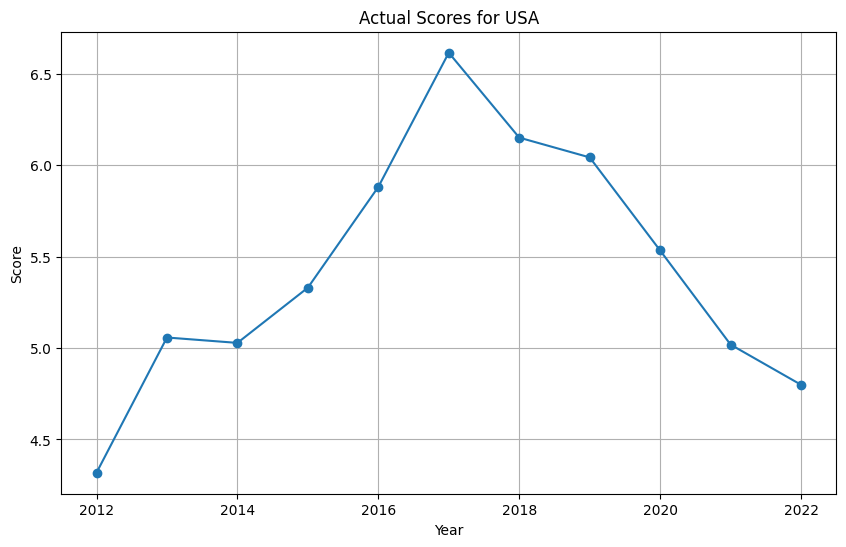

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your prediction data (actual scores) for the USA
prediction_data = pd.read_csv('/content/final_df.csv')

# Filter the data for the USA
usa_data = prediction_data[prediction_data['Country'] == 'United States']
print(usa_data)
# Create a plot of "Score" versus "Year"
plt.figure(figsize=(10, 6))
plt.plot(usa_data['Year'], usa_data['Score'], marker='o', linestyle='-')
plt.title('Actual Scores for USA')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)
plt.show()

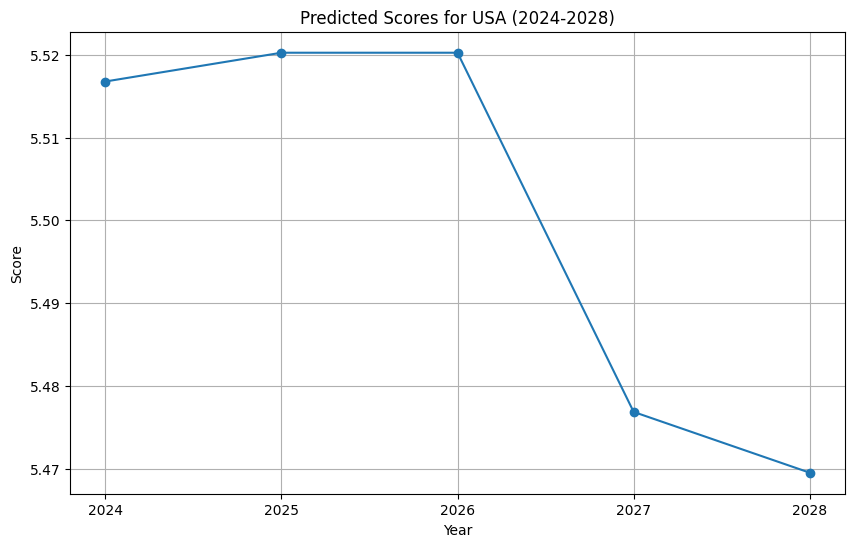

In [ ]:

# Load your prediction data (actual scores) for the USA
prediction_data = pd.read_csv('/content/predictions_with_country_year_rf.csv')

# Filter the data for the USA
usa_data = prediction_data[prediction_data['Country'] == 'United States']

# Create a plot of "Predicted_Score" versus "Year"
plt.figure(figsize=(10, 6))
plt.plot(usa_data['Year'], usa_data['Predicted_Score'], marker='o', linestyle='-')
plt.title('Predicted Scores for USA (2024-2028)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Set the x-axis ticks to integers
plt.xticks(range(int(usa_data['Year'].min()), int(usa_data['Year'].max()) + 1))

plt.show()
